An *agent* is anything that can perceive its *environment* through *sensors*, and act upon that environment through *actuators* based on its *agent program*

Our goal is to design an **agent program** (AP) that implements the *agent function*: the mapping from percepts to actions.

We assume this AP will run on some sort of computing device with physical sensors and actuators: we call this the architecture

An AP takes the current percept as input from the sensors and returns an action to the actuators.

The AP takes just the current percept as input because nothing more is available from the environment; if the agent's actions depend on the entire percept sequence, the agent will have to remember the percept.

**A table-driven agent program**

A table-driven AP keeps track of the percept sequence and then uses it to index into a table of actions to decide what to do.

The table represents *explicitly* the agent function that the agent program embodies.

In the 2-state vacuum world, the table would consist of all the possible states of the agent.

We will now create a table-driven AP for our 2-state environment.

In [3]:
import os
import sys

import random
import collections #we need collections.abc which provides abstract base classes that can be used to test whether a class provides a particular interface

In [4]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [11]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A2' #@param {type: "string"}
sys.path.append(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# These are the two locations for the two-state environme
from locations import *

In [14]:
table = {((loc_A, 'Clean'),): 'Right',
             ((loc_A, 'Dirty'),): 'Suck',
             ((loc_B, 'Clean'),): 'Left',
             ((loc_B, 'Dirty'),): 'Suck',
             ((loc_A, 'Dirty'), (loc_A, 'Clean')): 'Right',
             ((loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
             ((loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck',
             ((loc_B, 'Dirty'), (loc_B, 'Clean')): 'Left',
             ((loc_A, 'Dirty'), (loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
             ((loc_B, 'Dirty'), (loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck'
        }
        #......

In [15]:
from agentPrograms import TableDrivenAgentProgram

In [16]:
table

{(((0, 0), 'Clean'),): 'Right',
 (((0, 0), 'Dirty'),): 'Suck',
 (((1, 0), 'Clean'),): 'Left',
 (((1, 0), 'Dirty'),): 'Suck',
 (((0, 0), 'Dirty'), ((0, 0), 'Clean')): 'Right',
 (((0, 0), 'Clean'), ((1, 0), 'Dirty')): 'Suck',
 (((1, 0), 'Clean'), ((0, 0), 'Dirty')): 'Suck',
 (((1, 0), 'Dirty'), ((1, 0), 'Clean')): 'Left',
 (((0, 0), 'Dirty'), ((0, 0), 'Clean'), ((1, 0), 'Dirty')): 'Suck',
 (((1, 0), 'Dirty'), ((1, 0), 'Clean'), ((0, 0), 'Dirty')): 'Suck'}

In [17]:
a=[]
a.append(((1, 0), 'Clean'))
print(tuple(a))

(((1, 0), 'Clean'),)


In [18]:
f1=TableDrivenAgentProgram(table)
#print(f1((loc_A,'Dirty')))
print(f1((loc_A,'Clean')))

Right


In [19]:
print(f1((loc_B,'Dirty')))

Suck


In [ ]:
print(f1((loc_B,'Dirty')))

We got None above since there is not such percept sequence in our table.

Add handling for such cases to TableDrivenAgentProgram.

In [21]:
print(f1((loc_B,'Dirty')))

Not such percept sequence in my table
None


In [22]:
from agents import TableDrivenVacuumAgent

In [23]:
from agentClass import Agent

In [24]:
# Create a table-driven agent
tda1 = Agent(program=TableDrivenAgentProgram(table=table))

In [25]:
print(tda1.program((loc_A, 'Dirty')))

Suck


In [26]:
isinstance(tda1, Agent)

True

In [27]:
from trivialVacuumEnvironmentClass import *

In [28]:
environment = TrivialVacuumEnvironment()

In [29]:
tda2 = Agent(program=TableDrivenAgentProgram(table=table))

In [30]:
environment.add_thing(tda2)

print("State of the Environment: {}.".format(environment.status))
print("Agent is located at {}.".format(tda1.location))

Agent is starting in random location...
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
Agent is located at None.


In [31]:
environment.agents

[<Agent>]

In [32]:
environment.agents[0].location

(1, 0)

In [33]:
# Running the environment for 1 step
environment.step()

Agent percepted ((1, 0), 'Dirty').
Agent decided to do Suck.


In [34]:
environment.step()

Agent percepted ((1, 0), 'Clean').
Agent decided to do Left.


In [39]:
environment.step()

Not such percept sequence in my table
Agent percepted ((0, 0), 'Clean').
Agent decided to do None.


**Tasks:**

1. Implement the base class Food to store weight and calories.
And 2 derived classes Milk and Sausage. Calories are the same any instance accordingly to kind of food, but weight is different for instances.

2. Implemet the class Agent-Cat by using the Agent class.
Agent-Cat can eat and drink. And its performance changes depending on weight and calories of the food. It is necessary to check the type of food in order to apply the appropriate method (The Agent-Cat can't drink an instance of Sausage).

3. Implement the environment - Cat-Friendly-House - has 3 rooms in a row.

Place a one instance of Milk and a one of instance of Sausage in random room (but not in the same).

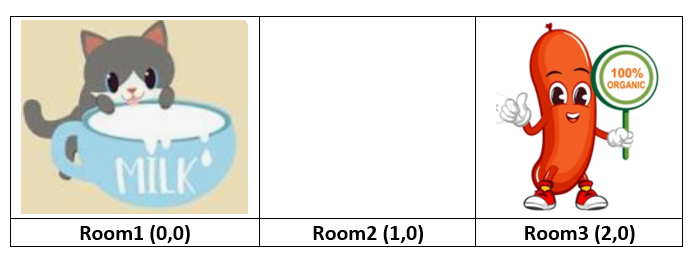

The status of the environment - unknown. But the .percept method of this class should set the state of the room based on the kind of instance located there. And it should return the info about status of the current agen't location as it is in our TrivialVacuumEnvironment. The state of the room is 'MilkHere'/'SausageHere' (if it contains any instance of the Food) or 'Empty'.

Place the Agent-Cat in random room.

4. If the Agent-Cat eats or drinks its performance changes (see 2.). Each movement -> perfomace -1
5. Available actions: MoveRight, MoveLeft, Drink, Eat.
6. Design and fill the look-up table, for ex.

feedingRules={((room1, 'Empty'),): 'MoveRight',
             ((room2, 'Empty'),): 'MoveRight',
             ((room3, 'Empty'),): 'MoveLeft',
             ((room1, 'MilkHere'),): 'Drink',
             ((room1, 'SausageHere'),): 'Eat',
             .......
             ((room1, 'MilkHere'), (room1, 'Empty')): 'MoveRight',
             ......
             ((room1, 'Empty'), (room2, 'SausageHere'), (room2, 'Empty')): 'MoveRight',
             .....}

The look-up table is stored in the separate file
7. Run the simulation by creating a House with food, and our Agent-Cat


